In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/historical_automobile_sales.csv")
np.random.seed(0)
df['Sales'] = np.random.randint(100, 1000, size=len(df))

df.to_csv("path_to_your_updated_data.csv", index=False)
print(df.head())


        Date  Year Month  Recession  Consumer_Confidence  Seasonality_Weight  \
0  1/31/1980  1980   Jan          1               108.24                0.50   
1  2/29/1980  1980   Feb          1                98.75                0.75   
2  3/31/1980  1980   Mar          1               107.48                0.20   
3  4/30/1980  1980   Apr          1               115.01                1.00   
4  5/31/1980  1980   May          1                98.72                0.20   

       Price  Advertising_Expenditure  Competition     GDP  Growth_Rate  \
0  27483.571                     1558            7  60.223     0.010000   
1  24308.678                     3048            4  45.986    -0.309594   
2  28238.443                     3137            3  35.141    -0.308614   
3  32615.149                     1653            7  45.673     0.230596   
4  23829.233                     1319            4  52.997     0.138197   

   unemployment_rate  Automobile_Sales     Vehicle_Type        City 

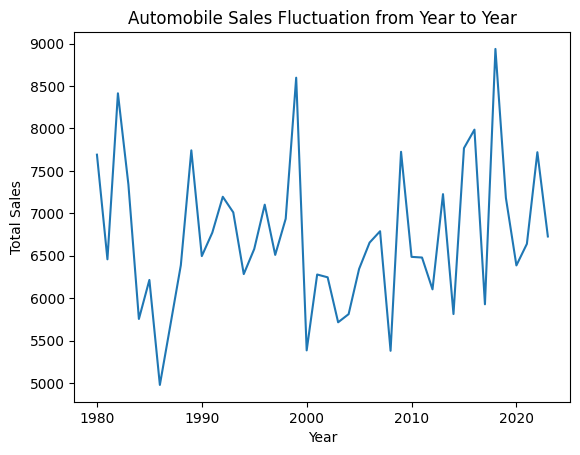

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("/content/path_to_your_updated_data.csv")

df.groupby('Year')['Sales'].sum().plot()
plt.title('Automobile Sales Fluctuation from Year to Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.savefig('Line_plot_1.png')
plt.show()


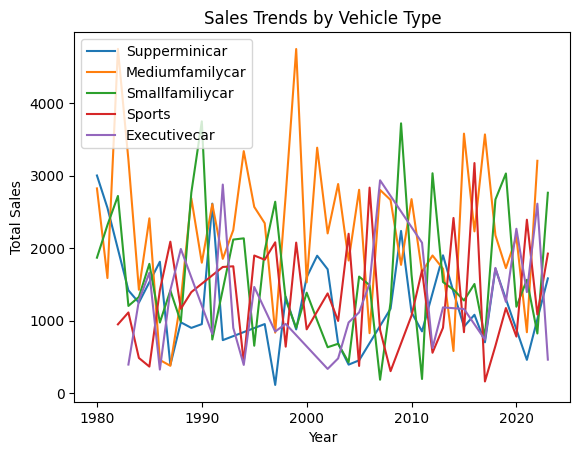

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/path_to_your_updated_data.csv")

for vehicle_type in df['Vehicle_Type'].unique():
    subset = df[df['Vehicle_Type'] == vehicle_type]
    subset.groupby('Year')['Sales'].sum().plot(label=vehicle_type)

plt.title('Sales Trends by Vehicle Type')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend()
plt.savefig('Line_plot_2.png')
plt.show()


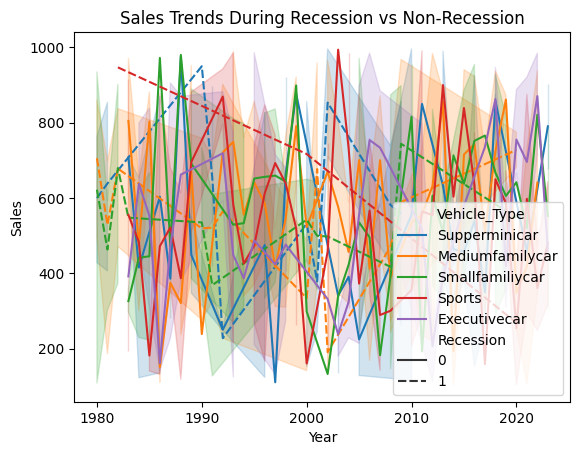

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/content/path_to_your_updated_data.csv")

sns.lineplot(data=df, x='Year', y='Sales', hue='Vehicle_Type', style='Recession')
plt.title('Sales Trends During Recession vs Non-Recession')
plt.savefig('Bar_Chart.png')
plt.show()


In [10]:
import pandas as pd

df = pd.read_csv("/content/path_to_your_updated_data.csv")
print(df.columns)


Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City', 'Sales'],
      dtype='object')


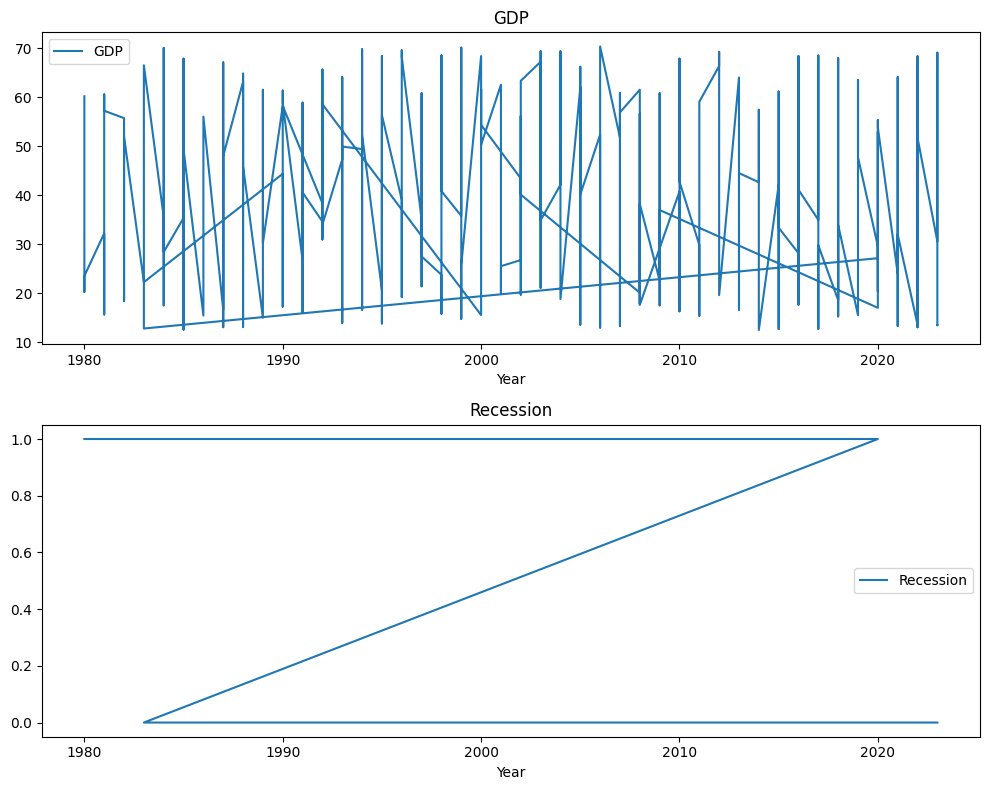

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/path_to_your_updated_data.csv")

fig, axs = plt.subplots(2, 1, figsize=(10, 8))

df.plot(x='Year', y='GDP', ax=axs[0], title='GDP')
df.plot(x='Year', y='Recession', ax=axs[1], title='Recession')

plt.tight_layout()
plt.savefig('Subplot.png')
plt.show()


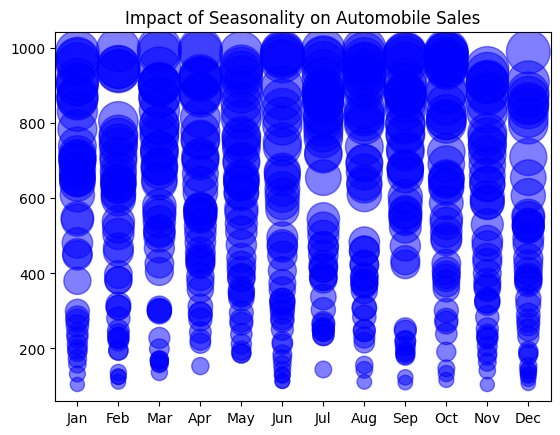

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/path_to_your_updated_data.csv")
plt.scatter(data=df, x='Month', y='Sales', s='Sales', c='blue', alpha=0.5)
plt.title('Impact of Seasonality on Automobile Sales')
plt.savefig('Bubble.png')
plt.show()


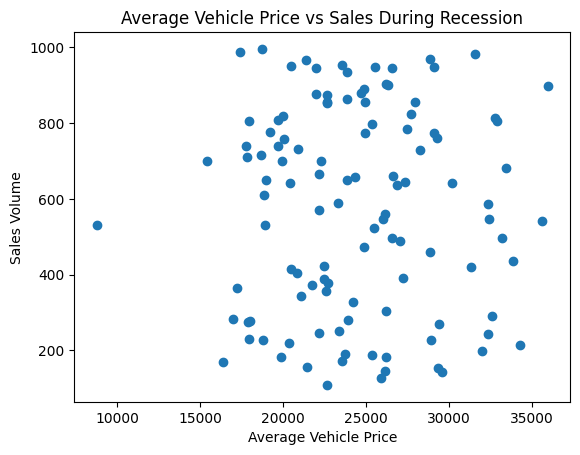

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("/content/path_to_your_updated_data.csv")
df_recession = df[df['Recession'] == True]

plt.scatter(data=df_recession, x='Price', y='Sales')
plt.title('Average Vehicle Price vs Sales During Recession')
plt.xlabel('Average Vehicle Price')
plt.ylabel('Sales Volume')
plt.savefig('Scatter.png')
plt.show()


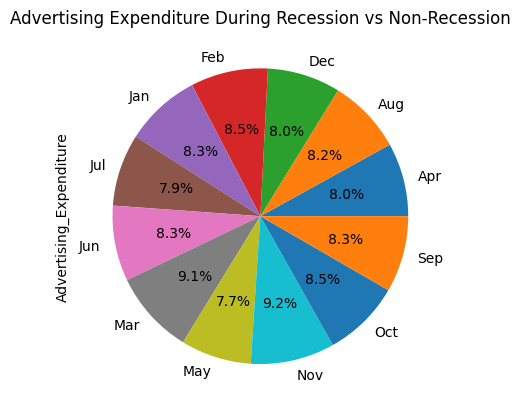

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/path_to_your_updated_data.csv")
expenditure = df.groupby('Month')['Advertising_Expenditure'].sum()
expenditure.plot.pie(autopct='%1.1f%%')
plt.title('Advertising Expenditure During Recession vs Non-Recession')
plt.savefig('Pie_1.png')
plt.show()


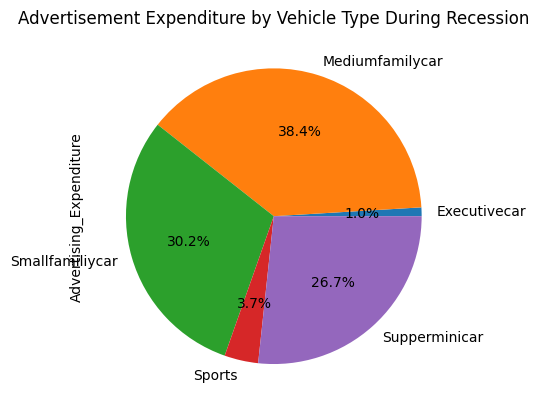

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("/content/path_to_your_updated_data.csv")

df_recession = df[df['Recession'] == True]

expenditure_by_type = df_recession.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()
expenditure_by_type.plot.pie(autopct='%1.1f%%')
plt.title('Advertisement Expenditure by Vehicle Type During Recession')
plt.savefig('Pie_2.png')
plt.show()


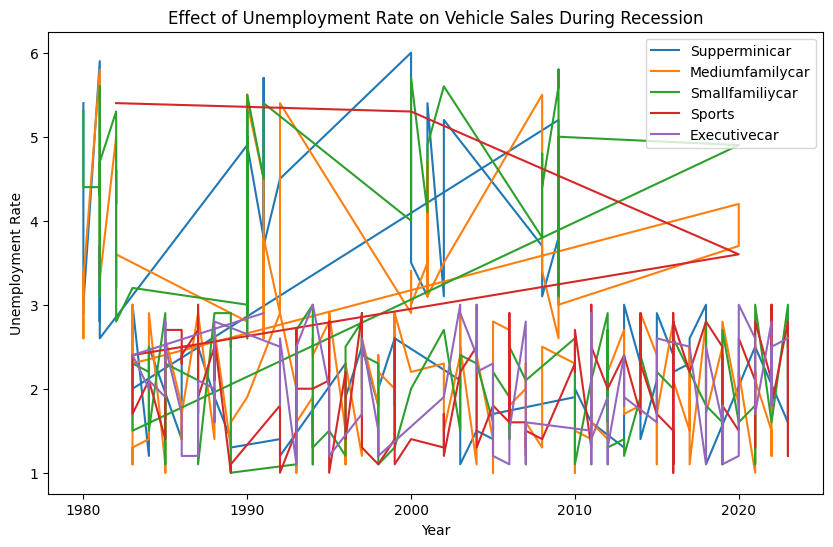

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/path_to_your_updated_data.csv")
plt.figure(figsize=(10, 6))
for vehicle_type in df['Vehicle_Type'].unique():
    subset = df[df['Vehicle_Type'] == vehicle_type]
    plt.plot(subset['Year'], subset['unemployment_rate'], label=vehicle_type)

plt.title('Effect of Unemployment Rate on Vehicle Sales During Recession')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.legend()
plt.savefig('Line_plot_3.png')
plt.show()


In [28]:
!pip install dash


In [29]:
import dash
import dash_core_components as dcc
import dash_html_components as html

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1('Automobile Sales Dashboard')
])

if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

In [30]:
app.layout = html.Div([
    html.H1('Automobile Sales Dashboard'),
    dcc.Dropdown(
        id='vehicle-type-dropdown',
        options=[
            {'label': 'Car', 'value': 'car'},
            {'label': 'Truck', 'value': 'truck'},
            {'label': 'SUV', 'value': 'suv'}
        ],
        value='car'
    )
])


In [31]:
app.layout = html.Div([
    html.H1('Automobile Sales Dashboard'),
    dcc.Dropdown(
        id='vehicle-type-dropdown',
        options=[
            {'label': 'Car', 'value': 'car'},
            {'label': 'Truck', 'value': 'truck'},
            {'label': 'SUV', 'value': 'suv'}
        ],
        value='car'
    ),
    html.Div(id='output-container', className='output-class')
])


In [32]:
@app.callback(
    dash.dependencies.Output('output-container', 'children'),
    [dash.dependencies.Input('vehicle-type-dropdown', 'value')]
)
def update_output(value):
    return f'You have selected {value}.'


In [34]:
import plotly.express as px

@app.callback(
    dash.dependencies.Output('output-container', 'children'),
    [dash.dependencies.Input('vehicle-type-dropdown', 'value')]
)
def update_output(value):
    fig_recession = px.line(df[df['Recession'] == True], x='Year', y='Sales', title='Recession Report Statistics')
    fig_yearly = px.line(df, x='Year', y='Sales', title='Yearly Report Statistics')
    return html.Div([
        dcc.Graph(figure=fig_recession),
        dcc.Graph(figure=fig_yearly)
    ])
